3 0.6154999999999999
5 0.6275000000000001
7 0.629
9 0.626
11 0.6285
13 0.6255000000000001
[3, 5, 7, 9, 11, 13]
[0.6154999999999999, 0.6275000000000001, 0.629, 0.626, 0.6285, 0.6255000000000001]


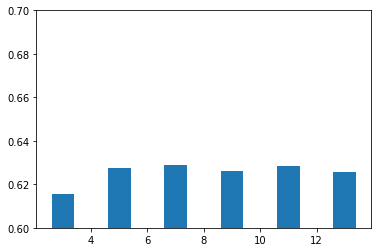

In [2]:
# Starting code for UVA CS 4501 Machine Learning- KNN

__author__ = 'Jia-Jiun Ku'
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
np.random.seed(37)
# for plot
# more imports
# the only purpose of the above import is in case that you want to compare your knn with sklearn knn


# Load file into np arrays
# x is the features
# y is the labels
def read_file(file):
    data = np.loadtxt(file, skiprows=1)
    np.random.shuffle(data)
    x = data[:, :-1]
    y = data[:, -1].astype(int)
    return x, y

# 2. Generate the i-th fold of k fold validation
# Input:
# x is an np array for training data
# y is an np array for labels
# i is an int indicating current fold
# nfolds is the total number of cross validation folds


def fold(x, y, i, nfolds):
    # your code
    num_examples = x.shape[0]
    num_per_fold = num_examples//nfolds
    test_start = i*num_per_fold
    x_train = np.concatenate(
        (x[0:test_start], x[test_start+num_per_fold:]), axis=0)
    y_train = np.concatenate(
        (y[0:test_start], y[test_start+num_per_fold:]), axis=0)
    x_test = x[test_start: test_start+num_per_fold]
    y_test = y[test_start: test_start+num_per_fold]
    return x_train, y_train, x_test, y_test

# 3. Classify each testing points based on the training points
# Input
# x_train: a numpy array of training data
# x_test: a numpy array
# k: the number of neighbors to take into account when predicting the label
# Output
# y_predict: a numpy array


def classify(x_train, y_train, x_test, k):
    def distanceFrom(x_to_predict):
        return lambda x: np.linalg.norm(x_to_predict - x[0])
    # your code
    # Euclidean distance as the measurement of distance in KNN
    y_predict = []
    for xi in x_test:
        # sorted_x = [xi for xi, yi in sorted(zip(x_train, y_train), key=distanceFrom(xi))]
        sorted_y = [yi for xi, yi in sorted(
            zip(x_train, y_train), key=distanceFrom(xi))]
        k_nearest = sorted_y[:k]
        # print(k_nearest)
        counts = Counter(k_nearest)
        y_predict.append(counts.most_common(1)[0][0])
    return y_predict

# 4. Calculate accuracy by comaring with true labels
# Input
# y_predict is a numpy array of 1s and 0s for the class prediction
# y is a numpy array of 1s and 0s for the true class label


def calc_accuracy(y_predict, y):
    # your code
    count = 0
    for y_predict_i, yi in zip(y_predict, y):
        if y_predict_i == yi:
            count += 1
    acc = count/y.shape[0]
    return acc

# 5. Draw the bar plot of k vs. accuracy
# klist: a list of values of ks
# accuracy_list: a list of accuracies


def barplot(klist, accuracy_list):
    # your code
    print(klist)
    print(accuracy_list)
    plt.bar(klist, accuracy_list)
    axes = plt.gca()
    axes.set_ylim([0.6, 0.7])
    plt.show()
    # use matplot lib to generate bar plot with K on x axis and cross validation accuracy on y-axis
    return

# 1. Find the best K


def findBestK(x, y, klist, nfolds):
    kbest = 0
    best_acc = 0
    accuracy_list = []
    for k in klist:
        # your code here
        n_fold_accuracy = []
        for i in range(nfolds):
            x_train, y_train, x_test, y_test = fold(x, y, i, nfolds)
            y_predict = classify(x_train, y_train, x_test, k)
            n_fold_accuracy.append(calc_accuracy(y_predict, y_test))
        # to get nfolds cross validation accuracy for k neighbors
        # implement fold(x, y, i, nfolds),classify(x_train, y_train, x_test, k) and calc_accuracy(y_predict, y)

        # CROSS VALIDATION accuracy for k neighbors
        accuracy = sum(n_fold_accuracy)/len(n_fold_accuracy)
        if accuracy > best_acc:
            kbest = k
            best_acc = accuracy
        accuracy_list.append(accuracy)
        print(k, accuracy)
    # plot cross validation error for each k : implement function barplot(klist, accuracy_list)
    barplot(klist, accuracy_list)
    return kbest


if __name__ == "__main__":
    filename = "Movie_Review_Data.txt"
    # read data
    x, y = read_file(filename)
    nfolds = 4
    klist = [3, 5, 7, 9, 11, 13]
    # Implementation covers two tasks, both part of findBestK function
    # Task 1 : implement kNN classifier for a given x,y,k
    # Task 2 : implement 4 fold cross validation to select best k from klist

    bestk = findBestK(x, y, klist, nfolds)
    # report best k, and accuracy, discuss why some k work better than others


In [1]:
# scores = cross_val_score(clf, x_train, y_train, cv=3)
def cross_val_score(clf, x_train, y_train, cv):
    train_scores = []
    test_scores = []
    num_per_fold = x_train.shape[0]//cv
    for i in range(cv):
#         x_train.iloc[np.r_[0:i*num_per_fold, (i+1)*num_per_fold:]]
        x_train_folds = x_train.iloc[np.r_[0:i*num_per_fold, (i+1)*num_per_fold:]]
        y_train_folds = y_train.iloc[np.r_[0:i*num_per_fold, (i+1)*num_per_fold:]]
        x_test_fold = x_train.iloc[i*num_per_fold:(i+1)*num_per_fold]
        y_test_fold = y_train.iloc[i*num_per_fold:(i+1)*num_per_fold]
        clf.fit(x_train_folds, y_train_folds)
        # Calculate test accuracy
        y_predict = clf.predict(x_test_fold)
        count = 0
        for yi_train, yi_predict in zip(y_test_fold, y_predict):
            if yi_train == yi_predict:
                count += 1
        test_scores.append(count/num_per_fold)
        # Calculate test fold accuracy
        y_predict = clf.predict(x_train_folds)
        count = 0
        for yi_train_folds, yi_predict in zip(y_train_folds, y_predict):
            if yi_train_folds == yi_predict:
                count += 1
        train_scores.append(count/x_train_folds.shape[0])
    return train_scores, test_scores

In [6]:
param_set = [
                 {'kernel': 'rbf', 'C': 1, 'degree': 1},
                 {'kernel': 'rbf', 'C': 1, 'degree': 3},
                 {'kernel': 'rbf', 'C': 1, 'degree': 5},
                 {'kernel': 'rbf', 'C': 1, 'degree': 7},
]
for p in param_set:
    print(p['kernel'])
    print(p['degree'])

rbf
1
rbf
3
rbf
5
rbf
7


In [5]:
# Starting code for UVA CS 4501 ML- SVM
import pandas
import sklearn
import numpy as np
np.random.seed(37)
import random

from sklearn.svm import SVC
# Att: You're not allowed to use modules other than SVC in sklearn, i.e., model_selection.

# Dataset information
# the column names (names of the features) in the data files
# you can use this information to preprocess the features
col_names_x = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country']
col_names_y = ['label']

numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
                  'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                    'race', 'sex', 'native-country']

# 1. Data loading from file and pre-processing.
# Hint: Feel free to use some existing libraries for easier data pre-processing. 
# For example, as a start you can use one hot encoding for the categorical variables and normalization 
# for the continuous variables.
def load_data(csv_file_path):
    # your code here
    df = pandas.read_csv("salary.labeled.csv", names=col_names_x+col_names_y)
    ## One-hot encoding
    one_hot_df = pandas.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
    ## normalize
    for col in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
        x, y = df[col].min(), df[col].max()
        one_hot_df[col] = (one_hot_df[col] - x) / (y - x)
#     print(one_hot_df)
    one_hot_df.loc[:, 'label'] = one_hot_df.loc[:, 'label'].str.strip()
#     print(one_hot_df.loc[0, 'label'] == '<=50K')
#     print(one_hot_df.loc[0, 'label'])
#     print(type(one_hot_df.loc[0, 'label']))
    one_hot_df.loc[one_hot_df.label == '<=50K' , 'label'] = 0
    one_hot_df.loc[one_hot_df.label == '>50K' , 'label'] = 1
    
    return one_hot_df.loc[:, one_hot_df.columns != 'label'], one_hot_df[col_names_y[0]]

# 2. Select best hyperparameter with cross validation and train model.
# Attention: Write your own hyper-parameter candidates.
def train_and_select_model(training_csv):
    # load data and preprocess from filename training_csv
    x_train, y_train = load_data(training_csv)
    # hard code hyperparameter configurations, an example:
    param_set = [
        {'kernel': 'rbf', 'C': 1, 'degree': 1},
        {'kernel': 'rbf', 'C': 1, 'degree': 3},
        {'kernel': 'rbf', 'C': 1, 'degree': 5},
        {'kernel': 'linear', 'C': 1, 'degree': 1},
        {'kernel': 'linear', 'C': 1, 'degree': 3},
        {'kernel': 'linear', 'C': 1, 'degree': 5},
        {'kernel': 'linear', 'C': 1, 'degree': 7},
        {'kernel': 'poly', 'C': 1, 'degree': 1},
        {'kernel': 'poly', 'C': 1, 'degree': 3},
        {'kernel': 'poly', 'C': 1, 'degree': 5},
        {'kernel': 'poly', 'C': 1, 'degree': 7},
        {'kernel': 'sigmoid', 'C': 1, 'degree': 3},
        {'kernel': 'sigmoid', 'C': 1, 'degree': 5},
        {'kernel': 'sigmoid', 'C': 1, 'degree': 7},
    ]
    # your code here
    scores = []
    best_params = None
    best_score = 0
    for params in param_set:
        clf = sklearn.svm.SVC(kernel=params['kernel'], C=params['C'], degree=params['degree'], gamma='auto')
        # iterate over all hyperparameter configurations
        # perform 3 FOLD cross validation
        cv_train_scores, cv_test_scores = cross_val_score(clf, x_train, y_train, cv=3)
        print(params)
        print('cv_train_scores: {}'.format(cv_train_scores))
        print('cv_test_scores: {}'.format(cv_test_scores))
        mean_score = np.mean(cv_test_scores)
        if mean_score > best_score:
            best_params = params
            best_score = mean_score
        # print cv scores for every hyperparameter and include in pdf report
    # select best hyperparameter from cv scores, retrain model
    best_model = sklearn.svm.SVC(kernel=best_params['kernel'], C=best_params['C'], degree=best_params['degree'], gamma='auto')
    best_model.fit(x_train, y_train)
    return best_model, best_score

# predict for data in filename test_csv using trained model
def predict(test_csv, trained_model):
    x_test, _ = load_data(test_csv)
    predictions = trained_model.predict(x_test)
    return predictions


# save predictions on test data in desired format 
def output_results(predictions):
    with open('predictions.txt', 'w') as f:
        for pred in predictions:
            if pred == 0:
                f.write('<=50K\n')
            else:
                f.write('>50K\n')


In [6]:
training_csv = "salary.labeled.csv"
testing_csv = "salary.2Predict.csv"
# fill in train_and_select_model(training_csv) to 
# return a trained model with best hyperparameter from 3-FOLD 
# cross validation to select hyperparameters as well as cross validation score for best hyperparameter. 
# hardcode hyperparameter configurations as part of train_and_select_model(training_csv)
trained_model, cv_score = train_and_select_model(training_csv)

print("The best model was scored %.2f" % cv_score)
# use trained SVC model to generate predictions
predictions = predict(testing_csv, trained_model)
# Don't archive the files or change the file names for the automated grading.
# Do not shuffle the test dataset
output_results(predictions)
# 3. Upload your Python code, the predictions.txt as well as a report to Collab.

cv_train_scores: [0.8261373291109909, 0.8296645297494916, 0.8302618367189311]
cv_test_scores: [0.8261373291109909, 0.8320846528153241, 0.8300764655904843]
cv_train_scores: [0.8261373291109909, 0.8296645297494916, 0.8302618367189311]
cv_test_scores: [0.8261373291109909, 0.8320846528153241, 0.8300764655904843]
cv_train_scores: [0.8261373291109909, 0.8296645297494916, 0.8302618367189311]
cv_test_scores: [0.8261373291109909, 0.8320846528153241, 0.8300764655904843]
cv_train_scores: [0.8530933807059551, 0.854174712288561, 0.853433227774774]
cv_test_scores: [0.8530933807059551, 0.855256043871167, 0.8515486213022322]
cv_train_scores: [0.8530933807059551, 0.854174712288561, 0.853433227774774]
cv_test_scores: [0.8530933807059551, 0.855256043871167, 0.8515486213022322]
cv_train_scores: [0.8530933807059551, 0.854174712288561, 0.853433227774774]
cv_test_scores: [0.8530933807059551, 0.855256043871167, 0.8515486213022322]
cv_train_scores: [0.8530933807059551, 0.854174712288561, 0.853433227774774]
cv_

In [11]:
# Library CV
# lib: [0.82630522 0.82522397 0.82705083]
x, y = load_data("salary.labeled.csv")
train_and_select_model("salary.labeled.csv")

{'kernel': 'rbf', 'C': 1, 'degree': 1}
[0.82630522 0.82522397 0.82705083]
{'kernel': 'rbf', 'C': 1, 'degree': 3}
[0.82630522 0.82522397 0.82705083]
{'kernel': 'rbf', 'C': 1, 'degree': 5}
[0.82630522 0.82522397 0.82705083]
{'kernel': 'linear', 'C': 1, 'degree': 1}
[0.85318196 0.85094223 0.85045574]
{'kernel': 'linear', 'C': 1, 'degree': 3}
[0.85318196 0.85094223 0.85045574]
{'kernel': 'linear', 'C': 1, 'degree': 5}
[0.85318196 0.85094223 0.85045574]
{'kernel': 'linear', 'C': 1, 'degree': 7}
[0.85318196 0.85094223 0.85045574]
{'kernel': 'poly', 'C': 1, 'degree': 1}
[0.82916281 0.8296262  0.83230341]
{'kernel': 'poly', 'C': 1, 'degree': 3}
[0.83387396 0.83070745 0.83469798]
{'kernel': 'poly', 'C': 1, 'degree': 5}
[0.83364226 0.83271548 0.83346207]
{'kernel': 'poly', 'C': 1, 'degree': 7}
[0.83379673 0.83402842 0.83477522]
{'kernel': 'sigmoid', 'C': 1, 'degree': 3}
[0.62735558 0.63044486 0.63170091]
{'kernel': 'sigmoid', 'C': 1, 'degree': 5}
[0.62735558 0.63044486 0.63170091]
{'kernel': 'si

In [83]:
df = pandas.read_csv("salary.labeled.csv", names=col_names_x+col_names_y)
print(df.shape)
df.iloc[0]
df.loc[:,col_names_x]
## One-hot encoding
one_hot_df = pandas.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
## normalize
for col in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    x, y = df[col].min(), df[col].max()
    one_hot_df[col] = (one_hot_df[col] - x) / (y - x)
for col in one_hot_df.columns:
    print(col)
# print(one_hot_df.shape)
one_hot_df[ ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
# df.iloc[:,-1]

(38842, 15)
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
label
workclass_ ?
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Never-worked
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ ?
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0.630137,0.129835,0.0,0.0,0.397959
1,0.260274,0.146818,0.0,0.0,0.500000
2,0.109589,0.124841,0.0,0.0,0.500000
3,0.753425,0.127214,0.0,0.0,0.397959
4,0.520548,0.122417,0.0,0.0,0.397959
...,...,...,...,...,...
38837,0.287671,0.045237,0.0,0.0,0.602041
38838,0.109589,0.275011,0.0,0.0,0.071429
38839,0.054795,0.206967,0.0,0.0,0.397959
38840,0.273973,0.076681,0.0,0.0,0.530612


In [ ]:
if __name__ == '__main__':
    training_csv = "salary.labeled.csv"
    testing_csv = "salary.2Predict.csv"
    # fill in train_and_select_model(training_csv) to 
    # return a trained model with best hyperparameter from 3-FOLD 
    # cross validation to select hyperparameters as well as cross validation score for best hyperparameter. 
    # hardcode hyperparameter configurations as part of train_and_select_model(training_csv)
    trained_model, cv_score = train_and_select_model(training_csv)

    print "The best model was scored %.2f" % cv_score
    # use trained SVC model to generate predictions
    predictions = predict(testing_csv, trained_model)
    # Don't archive the files or change the file names for the automated grading.
    # Do not shuffle the test dataset
    output_results(predictions)
    # 3. Upload your Python code, the predictions.txt as well as a report to Collab.